# Integrantes
### Juan David Rios Nisperuza - 202215787
### Laura Julieth Carretero Serrano - 202214922

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

# Ejercicio 1: Implementación de Newton Raphson para 2 dimensiones


### Grafica de la función y=3x^3-10x^2-56x+50.

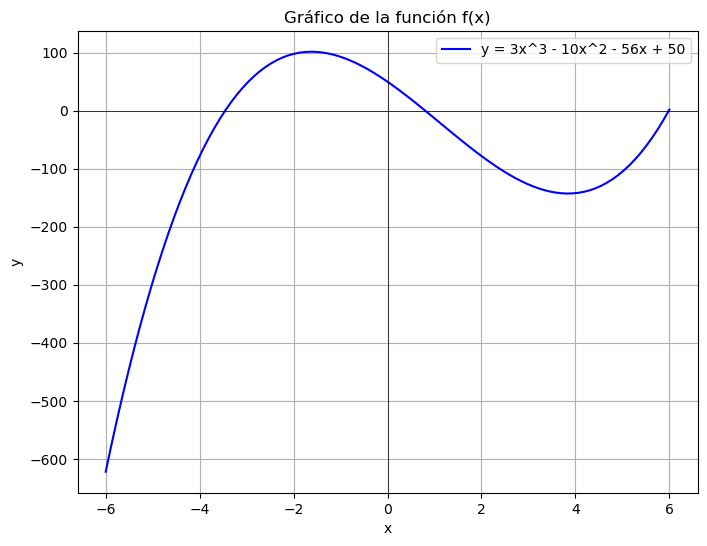

In [2]:
def f(x):
    return 3*x**3 - 10*x**2 - 56*x + 50

x = np.linspace(-6, 6, 100)
y = f(x)
plt.figure(figsize=(8,6))
plt.plot(x, y, label="y = 3x^3 - 10x^2 - 56x + 50", color='b')
plt.title("Gráfico de la función f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()


### Método de Newton Raphson para dos dimensiones 

In [3]:
def newton_raphson(f, df, ddf, x_init, alpha, tol=0.001, max_iter=100):
    x = x_init
    iter_values = [x]  
    for i in range(max_iter):
        grad = df(x)
        hess = ddf(x)
        if abs(grad) < tol:
            print(f'Converged after {i} iterations')
            break
        delta_x = grad / hess
        x = x - alpha * delta_x
        iter_values.append(x) 
    return x, iter_values

In [4]:
def f(x):
    return 3*x**3 - 10*x**2 - 56*x + 50

def df(x):
    return 9*x**2 - 20*x - 56

def ddf(x):
    return 18*x - 20

In [5]:
initial_guesses = [-6, 6]  
critical_points = []
alpha_1_iterations = []  

for guess in initial_guesses:
    critical_point, iter_values = newton_raphson(f, df, ddf, guess, alpha=1)
    critical_points.append(critical_point)
    alpha_1_iterations.extend(iter_values)  

results01 = []
for point in critical_points:
    second_derivative = ddf(point)
    if second_derivative > 0:
        results01.append((point, f(point), 'Mínimo'))
    elif second_derivative < 0:
        results01.append((point, f(point), 'Máximo'))
    else:
        results01.append((point, f(point), 'Punto de inflexión'))

# Imprimir resultados
for point, value, nature in results01:
    print(f'{nature} local en x = {point} con f(x) = {value}')

Converged after 4 iterations
Converged after 4 iterations
Máximo local en x = -1.6196142241481963 con f(x) = 101.7214199033094
Mínimo local en x = 3.8418235043585702 con f(x) = -142.62676970167053


In [6]:
initial_guesses = [-6]  
critical_points = []
alpha_01_iterations = []  

for guess in initial_guesses:
    critical_point, iter_values = newton_raphson(f, df, ddf, guess, alpha=1)
    critical_points.append(critical_point)
    alpha_01_iterations.extend(iter_values) 

results1 = []
for point in critical_points:
    second_derivative = ddf(point)
    if second_derivative > 0:
        results1.append((point, f(point), 'Mínimo'))
    elif second_derivative < 0:
        results1.append((point, f(point), 'Máximo'))
    else:
        results1.append((point, f(point), 'Punto de inflexión'))

alpha_06_iterations = []

for guess in initial_guesses:
    critical_point, iter_values = newton_raphson(f, df, ddf, guess, alpha=0.6)
    critical_points.append(critical_point)
    alpha_06_iterations.extend(iter_values) 

results06 = []
for point in critical_points:
    second_derivative = ddf(point)
    if second_derivative > 0:
        results06.append((point, f(point), 'Mínimo'))
    elif second_derivative < 0:
        results06.append((point, f(point), 'Máximo'))
    else:
        results06.append((point, f(point), 'Punto de inflexión'))


Converged after 4 iterations
Converged after 15 iterations


### Grafica del minimo y maximo encontrados

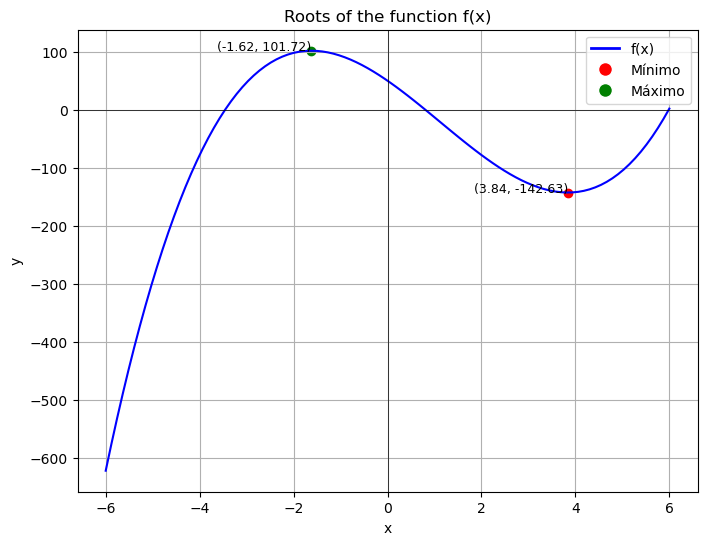

In [7]:
x = np.linspace(-6, 6, 100) 
y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x)", color='b')

for point, value, nature in results01:
    plt.scatter(point, value, color='red' if nature == 'Mínimo' else 'green' if nature == 'Máximo' else 'orange')
    plt.text(point, value, f'\n({point:.2f}, {value:.2f})', fontsize=9, ha='right')

plt.title("Roots of the function f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

# Leyenda
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Mínimo', markerfacecolor='red', markersize=10)
green_patch = plt.Line2D([0], [0], marker='o', color='w', label='Máximo', markerfacecolor='green', markersize=10)
plt.legend(handles=[plt.Line2D([0], [0], color='b', lw=2, label='f(x)'),red_patch, green_patch], loc='upper right')

plt.show()

### Grafica de los puntos encontrados en cada iteración

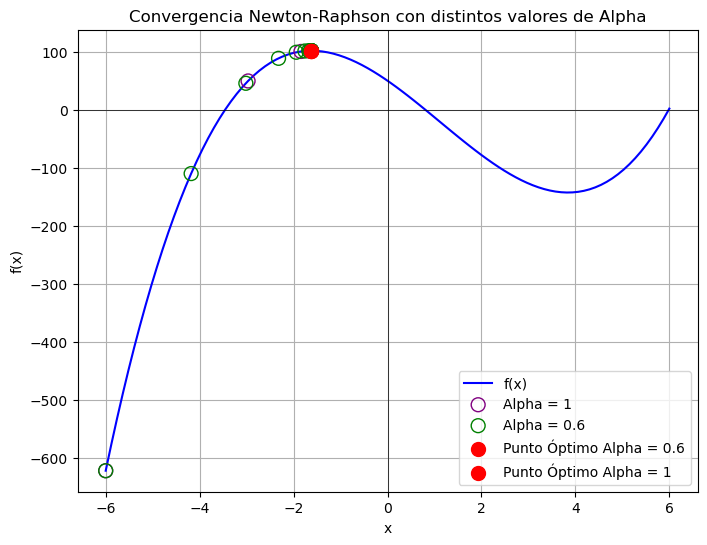

In [8]:
x = np.linspace(-6, 6, 100)
y = f(x)

plt.figure(figsize=(8, 6))

plt.plot(x, y, label="f(x)", color='b')

for iteration in alpha_01_iterations:
    plt.scatter(iteration, f(iteration), edgecolor='purple', facecolor='none', s=100, zorder=5, label='Alpha = 1')

for iteration in alpha_06_iterations:
    plt.scatter(iteration, f(iteration), edgecolor='green', facecolor='none', s=100, zorder=5, label='Alpha = 0.6')

for point, value, nature in results06:
    color = 'red'
    plt.scatter(point, value, color=color, s=100, zorder=5)

for point, value, nature in results1:
    color = 'red'
    plt.scatter(point, value, color=color, s=100, zorder=5)


# Título y etiquetas de los ejes
plt.title("Convergencia Newton-Raphson con distintos valores de Alpha")
plt.xlabel("x")
plt.ylabel("f(x)")

# Añadir líneas de referencia y leyenda
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.scatter([], [], color='red', s=100, label='Punto Óptimo Alpha = 0.6')  
plt.scatter([], [], color='red', s=100, label='Punto Óptimo Alpha = 1')   

# Crear leyenda personalizada
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles)) 
plt.legend(by_label.values(), by_label.keys(), loc='lower right')

# Mostrar la gráfica
plt.show()

# Ejercicio 2: Implementación de Newton Raphson para encontrar todos los máximos y mínimos de una función

In [9]:
def newton_raphson(f, df, ddf, x_init, alpha, tol=0.001, max_iter=100):
    x = x_init
    for i in range(max_iter):
        grad = df(x)
        hess = ddf(x)
        if abs(grad) < tol:
            print(f'Converged after {i} iterations')
            break
        delta_x = grad / hess
        x = x - alpha * delta_x 
    return x

In [10]:
def f(x):
    return x**5 - 8*x**3 + 10*x + 6

def df(x):
    return 5*x**4 - 24*x**2 + 10

def ddf(x):
    return 20*x**3 - 48*x


In [11]:
initial_guesses = [-3, -2, -1, 1, 2, 3]
critical_points = []

for guess in initial_guesses:
    critical_point = newton_raphson(f, df, ddf, guess, alpha=1)
    critical_points.append(critical_point)

unique_critical_points = np.unique(critical_points)


threshold = 0.1  
filtered_critical_points = []

for point in unique_critical_points:
    if not any(abs(point - p) < threshold for p in filtered_critical_points):
        filtered_critical_points.append(point)

results = []
for point in filtered_critical_points:
    second_derivative = ddf(point)
    if second_derivative > 0:
        results.append((point, f(point), 'Mínimo'))
    elif second_derivative < 0:
        results.append((point, f(point), 'Máximo'))
    else:
        results.append((point, f(point), 'Punto de inflexión'))

# Encontrar máximos y mínimos globales
global_min = min(f(point) for point, _, nature in results)
global_max = max(f(point) for point, _, nature in results)

Converged after 5 iterations
Converged after 3 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 3 iterations
Converged after 5 iterations


### Grafica de los minimos y maximos locales y globales encontrados

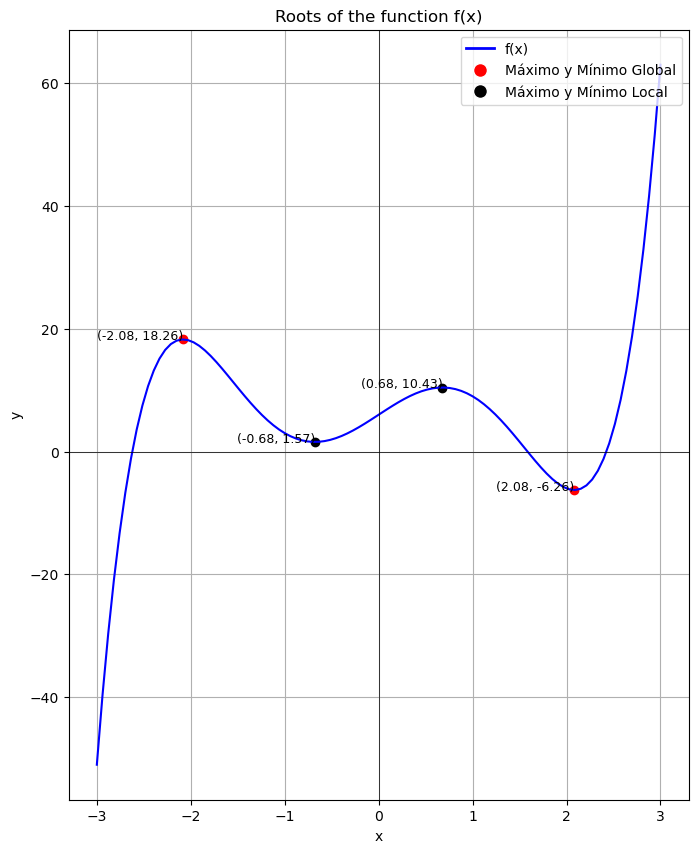

In [12]:
x = np.linspace(-3, 3, 100) 
y = f(x)

plt.figure(figsize=(8, 10))
plt.plot(x, y, label="f(x)", color='b')

for point, value, nature in results:
    if value == global_max or value == global_min:
        plt.scatter(point, value, color='red')  
    else:
        plt.scatter(point, value, color='black')  
    plt.text(point, value, f'\n({point:.2f}, {value:.2f})', fontsize=9, ha='right')

plt.title("Roots of the function f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

# Leyenda
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Máximo y Mínimo Global', markerfacecolor='red', markersize=10)
black_patch = plt.Line2D([0], [0], marker='o', color='w', label='Máximo y Mínimo Local', markerfacecolor='black', markersize=10)
plt.legend(handles=[plt.Line2D([0], [0], color='b', lw=2, label='f(x)'), red_patch, black_patch], loc='upper right')

plt.show()

# Ejercicio 3: Implementación de Newton Raphson para 3 dimensiones

In [13]:
def f(x,y):
    return (x-1)**2 + 100(y-x**2)**2

def grad_f(x,y):
    grad_x = 2 * (x - 1) - 400 * x * (y - x**2)
    grad_y = 200 * (y - x**2)
    return np.array([grad_x, grad_y])

def hessian_f(x, y):
    hess_xx = 2 - 400 * y + 1200 * x**2
    hess_xy = -400 * x
    hess_yx = -400 * x
    hess_yy = 200
    return np.array([[hess_xx, hess_xy], [hess_yx, hess_yy]])


<>:2: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:2: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\Admin\AppData\Local\Temp\ipykernel_24384\3424151603.py:2: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  return (x-1)**2 + 100(y-x**2)**2


In [14]:
def newton_raphson_f(x_init, y_init, alpha=1, tol=1e-6, max_iter=100):
    x, y = x_init, y_init
    puntos = []
    for i in range(max_iter):
        grad = grad_f(x, y)
        hess = hessian_f(x, y)
        delta = np.linalg.inv(hess) @ grad
        x_next = x - alpha * delta[0]
        y_next = y - alpha * delta[1]
        puntos.append((x_next, y_next))     
        if np.linalg.norm(grad) < tol:
            print(f'Convergencia alcanzada en {i} iteraciones')
            break
        x, y = x_next, y_next
        
    return x, y, puntos

In [15]:
x0 =0
y0 = 10
sol_x, sol_y,puntos = newton_raphson_f(x0, y0)
print(f'Solución: x = {sol_x}, y = {sol_y}')


Convergencia alcanzada en 5 iteraciones
Solución: x = 1.0, y = 1.0


### Grafica del minimo de la función encontrado y los puntos teoricos encontrados

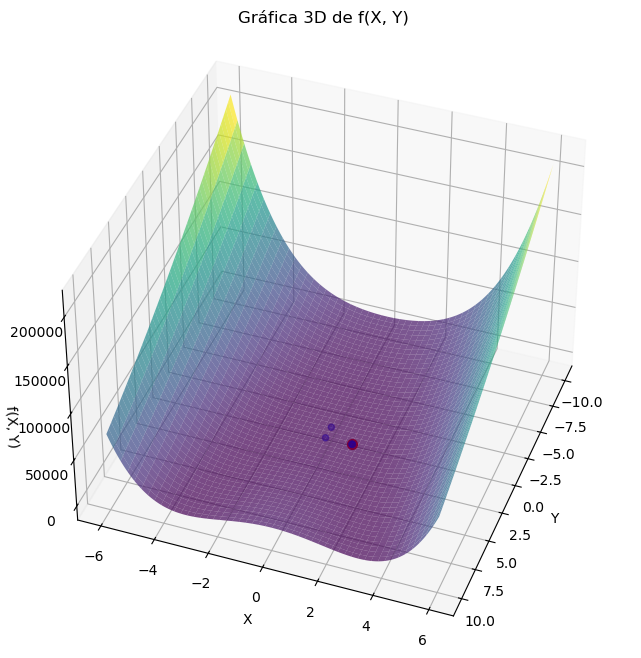

In [16]:
x, y = sp.symbols('x y')
expr = (x - 1)**2 + 100 * (y - x**2)**2

f = sp.lambdify((x, y), expr, 'numpy')
x_values = np.linspace(-6, 6, 400)
y_values = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_values, y_values)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sol_x, sol_y, color='red', label='Solución', s=50)  

puntos = np.array(puntos)
ax.scatter(puntos[:, 0], puntos[:, 1], color='blue', label='Puntos iterativos', alpha=0.5)

ax.plot_surface(Y, X, Z, cmap='viridis', alpha=0.7)

ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('f(X, Y)')
ax.set_title('Gráfica 3D de f(X, Y)')

ax.view_init(elev=40, azim=20)  

plt.show()